In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import os
import glob
import pandas as pd

## Data I/O

In [2]:
# set overall data path
datapath = 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/screening_rerun/139-147/'
datapath1 = 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/screening_rerun/139-147/rep1/'
datapath2 = 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/screening_rerun/139-147/rep2/'
datapath3= 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/screening_rerun/139-147/rep3/'
datapath4 = 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/screening_rerun/139-147/rep4/'
datapath5 = 'D:/Dropbox/Cofilin_oligomer/umbrella_sampling/screening_rerun/139-147/rep5/'

In [3]:
# load the multiple-data files for trajectories

wham_file1 = [os.path.join(datapath1+f'{i}'+'/wham.dat') for i in range(24,40)]
wham_file2 = [os.path.join(datapath2+f'{i}'+'/wham.dat') for i in range(24,40)]
wham_file3 = [os.path.join(datapath3+f'{i}'+'/wham.dat') for i in range(24,40)]
wham_file4 = [os.path.join(datapath4+f'{i}'+'/wham.dat') for i in range(24,40)]
wham_file5 = [os.path.join(datapath5+f'{i}'+'/wham.dat') for i in range(24,40)]

In [4]:
# load the Q-interface files for trajectories (in case of use)

Qi_file1 = [os.path.join(datapath1+f'{i}'+'/step1_qi') for i in range(24,40)]
Qi_file2 = [os.path.join(datapath2+f'{i}'+'/step1_qi') for i in range(24,40)]
Qi_file3 = [os.path.join(datapath3+f'{i}'+'/step1_qi') for i in range(24,40)]
Qi_file4 = [os.path.join(datapath4+f'{i}'+'/step1_qi') for i in range(24,40)]
Qi_file5 = [os.path.join(datapath5+f'{i}'+'/step1_qi') for i in range(24,40)]

In [5]:
# Load the data and concatenate all replicates

Q_global_data = []
for i in range(len(wham_file1)):
#     data += [np.append(np.loadtxt(wham_file[i])[:, 1], np.loadtxt(wham_file[i])[:, 3])]
    Q_global_data += [np.append(np.loadtxt(wham_file1[i])[5:, 1], 
                       [np.loadtxt(wham_file2[i])[5:, 1], np.loadtxt(wham_file3[i])[5:, 1], 
                        np.loadtxt(wham_file4[i])[5:, 1], np.loadtxt(wham_file5[i])[5:, 1]])]
    # dicard the first 5 rows and choose the second column which is global Q
    
rg_data = []
for i in range(len(wham_file1)):
    rg_data += [np.append(np.loadtxt(wham_file1[i])[5:, 2], 
                       [np.loadtxt(wham_file2[i])[5:, 2], np.loadtxt(wham_file3[i])[5:, 2], 
                        np.loadtxt(wham_file4[i])[5:, 2], np.loadtxt(wham_file5[i])[5:, 2]])]
    
E_P_data = []
for i in range(len(wham_file1)):
    E_P_data += [np.append(np.loadtxt(wham_file1[i])[5:, 3], 
                       [np.loadtxt(wham_file2[i])[5:, 3], np.loadtxt(wham_file3[i])[5:, 3], 
                        np.loadtxt(wham_file4[i])[5:, 3], np.loadtxt(wham_file5[i])[5:, 3]])]
    
E_bias_data = []
for i in range(len(wham_file1)):
    E_bias_data += [np.append(np.loadtxt(wham_file1[i])[5:, 4], 
                       [np.loadtxt(wham_file2[i])[5:, 4], np.loadtxt(wham_file3[i])[5:, 4], 
                        np.loadtxt(wham_file4[i])[5:, 4], np.loadtxt(wham_file5[i])[5:, 4]])]
    
Q_interface_data = []
for i in range(len(Qi_file1)):
    Q_interface_data += [np.append(np.loadtxt(Qi_file1[i])[5:, 1], 
                       [np.loadtxt(Qi_file2[i])[5:, 1], np.loadtxt(Qi_file3[i])[5:, 1], 
                        np.loadtxt(Qi_file4[i])[5:, 1], np.loadtxt(Qi_file5[i])[5:, 1]])]

In [6]:
# check data dimension
print(len(Q_global_data), Q_global_data[0].shape)
print(len(rg_data), rg_data[0].shape)
print(len(E_P_data), E_P_data[0].shape)
print(len(E_bias_data), E_bias_data[0].shape)
print(len(Q_interface_data), Q_interface_data[0].shape)

16 (3980,)
16 (3980,)
16 (3980,)
16 (3980,)
16 (3980,)


In [7]:
Q_global_data_concatenated=np.concatenate(Q_global_data,axis=0)
rg_data_concatenated=np.concatenate(rg_data,axis=0)
E_P_data_concatenated=np.concatenate(E_P_data,axis=0)
E_bias_data_concatenated=np.concatenate(E_bias_data,axis=0)
Q_interface_data_concatenated=np.concatenate(Q_interface_data,axis=0)

In [8]:
#Load pmf data that were previously generated

pmf_data = np.loadtxt('%s/%s' %(datapath, 'pmf_139-147_concatenated.txt'), usecols=None)


us_traj_data = Q_global_data_concatenated
xtraj_data = rg_data_concatenated
ytraj_data = E_P_data_concatenated

## some other options

# xtraj_data = Q_global_data_concatenated
# ytraj_data = rg_data_concatenated


# xtraj_data = Q_global_data_concatenated
# ytraj_data = Q_interface_data_concatenated

# xtraj_data = Q_global_data_concatenated
# ytraj_data = E_bias_data_concatenated


# ytraj_data = E_bias_data_concatenated

In [9]:
#Check data format
# print(np.array(filenames).shape)
print(pmf_data.shape)
print(us_traj_data.shape, xtraj_data.shape, ytraj_data.shape)
print(us_traj_data, "\n", xtraj_data,"\n", ytraj_data,"\n")

(296, 2)
(63680,) (63680,) (63680,)
[0.49193949 0.49963087 0.50230367 ... 0.95656055 0.94683848 0.95025568] 
 [28.61935514 26.68183221 26.31530199 ... 22.13079656 22.01060699
 22.17193746] 
 [-2617.63200032 -2627.14319809 -2603.10042611 ... -2719.81278898
 -2730.82940781 -2752.20476687] 



In [10]:
print (pmf_data)

[[ 0.49160419  1.47881674]
 [ 0.49490743  2.78741434]
 [ 0.49821067  3.39572762]
 [ 0.49986229  2.22438412]
 [ 0.50151391  2.54895654]
 [ 0.50316552  2.74393668]
 [ 0.50481714  3.06296924]
 [ 0.50646876  2.89384576]
 [ 0.50812038  2.73719392]
 [ 0.509772    4.49794872]
 [ 0.51142362  3.48185021]
 [ 0.51307524  3.51450589]
 [ 0.51472686  4.35513835]
 [ 0.51637848  3.97713476]
 [ 0.5180301   4.23280079]
 [ 0.51968172  4.81637135]
 [ 0.52133334  6.17408186]
 [ 0.52298496  5.27095162]
 [ 0.52628819  6.08037842]
 [ 0.52793981  6.59227584]
 [ 0.52959143  7.9032297 ]
 [ 0.53124305  6.46541182]
 [ 0.53289467  6.90428996]
 [ 0.53454629  7.40026279]
 [ 0.53619791  6.45796657]
 [ 0.53784953  7.51217632]
 [ 0.53950115  6.94918123]
 [ 0.54115277  7.37985811]
 [ 0.54280439  7.73588367]
 [ 0.54445601  7.74986742]
 [ 0.54610762  7.61863072]
 [ 0.54775924  7.11423243]
 [ 0.54941086  8.05317916]
 [ 0.55106248  7.54750082]
 [ 0.5527141   7.63541869]
 [ 0.55436572  7.27952681]
 [ 0.55601734  7.14472132]
 

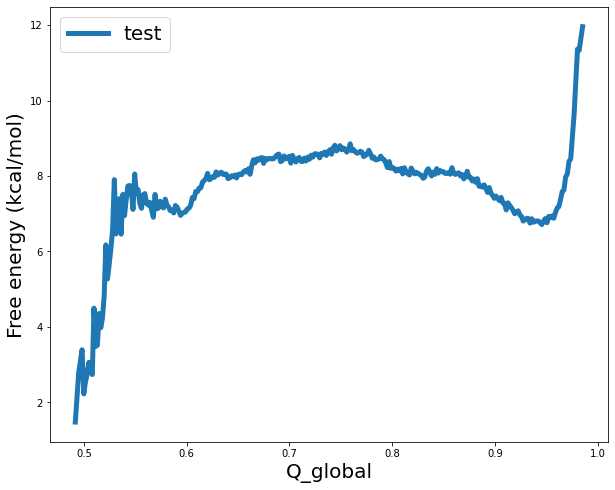

In [11]:
#Check data using view graphs
plt.figure(figsize=(10,8))
plt.plot(pmf_data[:,0],pmf_data[:,1], '-', linewidth = 5, label = 'test')
plt.xlabel('Q_global', fontsize = 20)
plt.ylabel('Free energy (kcal/mol)', fontsize = 20)
plt.legend(prop={'size': 20})
plt.show()

## Functions

In [12]:
def pmf1d(pmf, us_traj, xtraj):
    '''
    pmf_data: 
    us_traj:
    xtraj:
    '''
    #load pmf and normalization
    print("test")
    
    #Calculate unbiased probability for each sample, pi_sample
    
    #Use Pi_sample to construct probability along the coordinate x
    #F(x) collects individual Pi_sample data on the new progress coordinate x (projection)

    #Calculate projected PMF (free energy)
    
    #Plot 1D pmf

In [43]:
def pmf2d(pmf, us_traj, xtraj, ytraj):
    '''
    pmf_data: 
    us_traj:
    xtraj:
    ytraj:
    '''
    #####Load pmf and normalize probability#####
    T = 300; # Kelvin
    k = 0.001987; # kcal/mol/K
    qb = pmf[:,0]; f = pmf[:,1]; nbins = len(qb);
    dq = (qb[-1]-qb[0])/(nbins-1); qmin = qb[0]-dq/2; qmax = qb[nbins-1]+dq/2;
    p = np.exp(-f/(k*T)); p_norm = np.sum(p)
    pp = p/p_norm;
    #print(qb, f, nbins,"\n"); print(dq,qmin,qmax,"\n");print(pp)
    
    #####Calculate unbiased probability for each sample, pi_sample#####
    Nsample = len(us_traj); x_Nsample = len(xtraj); y_Nsample = len(ytraj)
    assert (Nsample == x_Nsample and Nsample == y_Nsample and x_Nsample == y_Nsample) , "The dimension of data does not match." 
    pi_sample = np.zeros(Nsample,); n_sample = np.zeros(nbins,)
    for j_bin in range(nbins):
        qj_min = qmin + j_bin*dq; qj_max = qj_min + dq
        ids = np.where(np.logical_and(us_traj >= qj_min, us_traj < qj_max))
        n_sample[j_bin] = len(np.array(ids)[0,:])
        if n_sample[j_bin] > 0:
            pi_sample[ids] = pp[j_bin]/n_sample[j_bin]
        #print(qj_min, qj_max)
    P_sum = sum(pi_sample)
    print("The probability of sum(pi_sample) = %10.8f" %P_sum)
    print (sum(pp))
    print (nbins)
    print (P_sum)
    print(pi_sample.shape, n_sample.shape)
    print(pi_sample)
    print(ids,np.array(ids)[0,:])
#     assert (P_sum > 0.999999 and P_sum < 1.000001), "The propability is not normalized."
#     print (P_sum)
#     print(pi_sample.shape, n_sample.shape)
#     print(pi_sample)
#     print(ids,np.array(ids)[0,-10:])
    
    #####Use pi_sample to construct 2D probability matrix M(x,y)#####
    #####M(x,y) collects individual pi_sample data on the new progress coordinates x and y (projection)#####
    M_nbins = 30; M = np.zeros((M_nbins, M_nbins))
    xmin = min(xtraj); xmax = max(xtraj); ymin = min(ytraj); ymax = max(ytraj)
    x_bin = np.linspace(xmin, xmax, num = M_nbins); y_bin = np.linspace(ymin, ymax, num = M_nbins)
    x_bin_ids = np.digitize(xtraj, bins = x_bin); y_bin_ids = np.digitize(ytraj, bins = y_bin)
    for i_sample in range(Nsample):
        x = x_bin_ids[i_sample]; y = y_bin_ids[i_sample]
        M[x-1,y-1] = M[x-1,y-1] + pi_sample[i_sample]
    M = np.transpose(M)
    PM_sum = sum(sum(M))
    print("The probability of sum(sum(M)) = %10.8f" %PM_sum)
#     assert (PM_sum > 0.999999 and PM_sum < 1.000001), "The propability of sum_x,y M(x,y) is not normalized."
    #print(x_bin_ids[-100:])
    #print(M[15,:])
    
    #####Calculate projected PMF (free energy)#####
    cutoff = 15;
    F = -k*T*np.log(M)
    ids_cutoff = np.where(F >= cutoff); F[ids_cutoff] = cutoff
    #print(F[9,:])
    print(type(F),F.shape)
    
    #####Plot 2D pmf#####
    # create colormap
    # ---------------
    
    # create a colormap that consists of
    # - 1/5 : custom colormap, ranging from white to the first color of the colormap
    # - 4/5 : existing colormap
    
    # set upper part: 4 * 256/4 entries
    upper = mpl.cm.jet(np.arange(256))
    
    # set lower part: 1 * 256/4 entries
    # - initialize all entries to 1 to make sure that the alpha channel (4th column) is 1
    lower = np.ones((int(256/4),4))
    # - modify the first three columns (RGB):
    #   range linearly between white (1,1,1) and the first color of the upper colormap
    for i in range(3):
        #lower[:,i] = np.linspace(1, upper[-1,i], lower.shape[0])
        lower[:,i] = np.ones((1,1))
    reversed_lower = lower[::-1]

    # combine parts of colormap
    #cmap = np.vstack(( lower, upper ))
    cmap = np.vstack(( upper, reversed_lower ))
  
    
    # convert to matplotlib colormap
    cmap = mpl.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])
    
    n_contours = 20
    X, Y = np.meshgrid(x_bin, y_bin)
    #print(X.shape, Y.shape, F.shape)
    
    mpl.rc('font',family='Arial')
    fig,ax = plt.subplots(figsize=(6,5))
    
    contourf_ = ax.contourf(X,Y, F, n_contours, cmap='RdYlBu') #cmap=plt.cm.hot
    
    cbar = fig.colorbar(contourf_)
    
    plt.ylabel(r'E-potential',fontsize=15)
#     plt.xlabel(r'Q-global',fontsize=15)
    plt.xlabel(r'Rg',fontsize=15)
    plt.savefig('./EP-Rg_concatenated.png',dpi=1200)
    plt.show()

## Example Usage

The probability of sum(pi_sample) = 0.81341900
0.9999999999999991
296
0.8134189972317554
(63680,) (296,)
[2.34621461e-01 1.40482505e-02 8.22598563e-03 ... 1.11145951e-07
 1.62755085e-07 1.25078728e-07]
(array([59998, 62041], dtype=int64),) [59998 62041]
The probability of sum(sum(M)) = 0.81341900
<class 'numpy.ndarray'> (30, 30)


<ipython-input-43-1f518337fffb>:60: RuntimeWarning: divide by zero encountered in log
  F = -k*T*np.log(M)


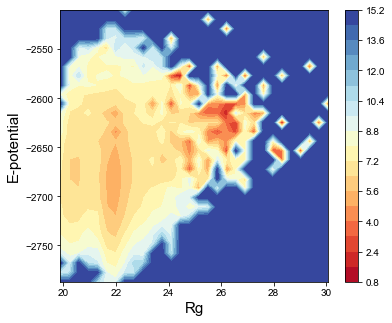

In [44]:
pmf2d(pmf_data, us_traj_data, xtraj_data, ytraj_data)